In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1V54UGwEUjXa1CWKAMX_XZUKvFFY4FJTJ'

In [3]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1V54UGwEUjXa1CWKAMX_XZUKvFFY4FJTJ


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('international-airline-passengers.csv')  

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Using TensorFlow backend.


In [0]:
df = pd.read_csv('international-airline-passengers.csv',sep=";")

In [7]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
L=len(df)
X=np.array([range(1,L)])
y=np.array([df.iloc[:,1]])
y=y[:,0:L-1]

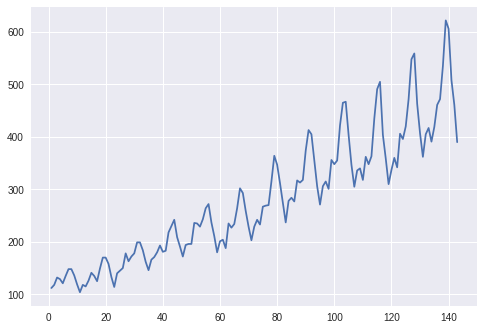

In [9]:
plt.figure(1)
plt.plot(X[0,:],y[0,:])
plt.show(block= False)

In [0]:
X1=y[:,0:L-4]
X2=y[:,1:L-3]
X3=y[:,2:L-2]

In [11]:
print(X1.shape,X2.shape,X3.shape)

(1, 140) (1, 140) (1, 140)


In [0]:
X=np.concatenate([X1,X2,X3],axis=0)
X=np.transpose(X)

In [13]:
y=np.transpose(y[:,3:L-1])
print(X.shape, y.shape)

(140, 3) (140, 1)


In [0]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [0]:
scaler1 = MinMaxScaler()
scaler1.fit(y)
y=scaler1.transform(y)

In [16]:
model = Sequential([
Dense(32,activation='relu',input_dim=3),
Dense(32,activation='relu'),
Dense(1,activation='sigmoid'),
])
# Model Summary
model.summary()
# Compiling the Model
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=["mean_absolute_error"])
# Fitting the Model
model.fit(X,y,epochs= 500 , batch_size=32,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
140/140 [==============================] - 0s 878us/step - loss: 0.0734 - mean_absolute_error: 0.2307
Epoch 2/500
140/140 [==============================] - 0s 78us/step - loss: 0.0679 - mean_absolute_error: 0.2211
Epoch 3/500
140/140 [==============================] - 0s 113us/step - loss: 0.0637 - mean_absolute_error: 0.2143
Epoch 4/500
140/140 [==============================] - 0s 88us/

In [17]:
predictions = model.predict(X,verbose=1)
print(predictions[:5])

140/140 [==============================] - 0s 143us/step
[[0.05470694]
 [0.05416459]
 [0.04912081]
 [0.05915044]
 [0.0751778 ]]


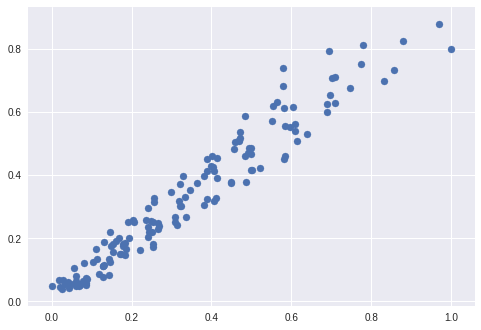

In [18]:
plt.figure(2)
plt.scatter(y,predictions)
plt.show(block=False)

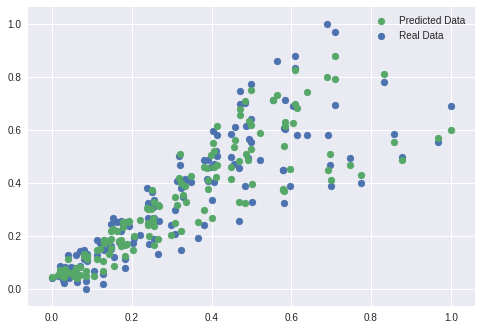

In [19]:
plt.figure(3)
Test= plt.scatter(X[:,0],y)
Predict = plt.scatter(X[:,0],predictions)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()